In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata238.xlsx', index_col=0)

In [3]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE', 'ASBG10A', 'ASBG10B', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05', 'MINAGEARRIVAL'


In [24]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [25]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [26]:
pivot_df_feelingsinschool = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean')

<Figure size 1080x720 with 0 Axes>

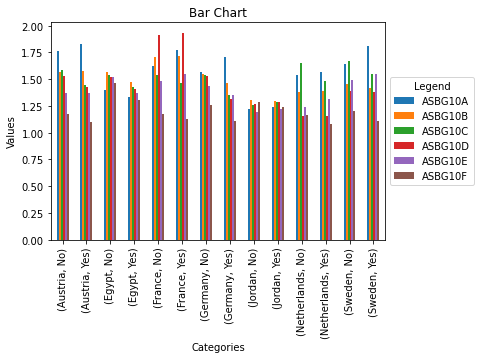

In [27]:
plt.figure(figsize=(15,10))
ax3 = pivot_df_feelingsinschool.plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
# Move the legend outside the plot
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

**This is too small - make it bigger**

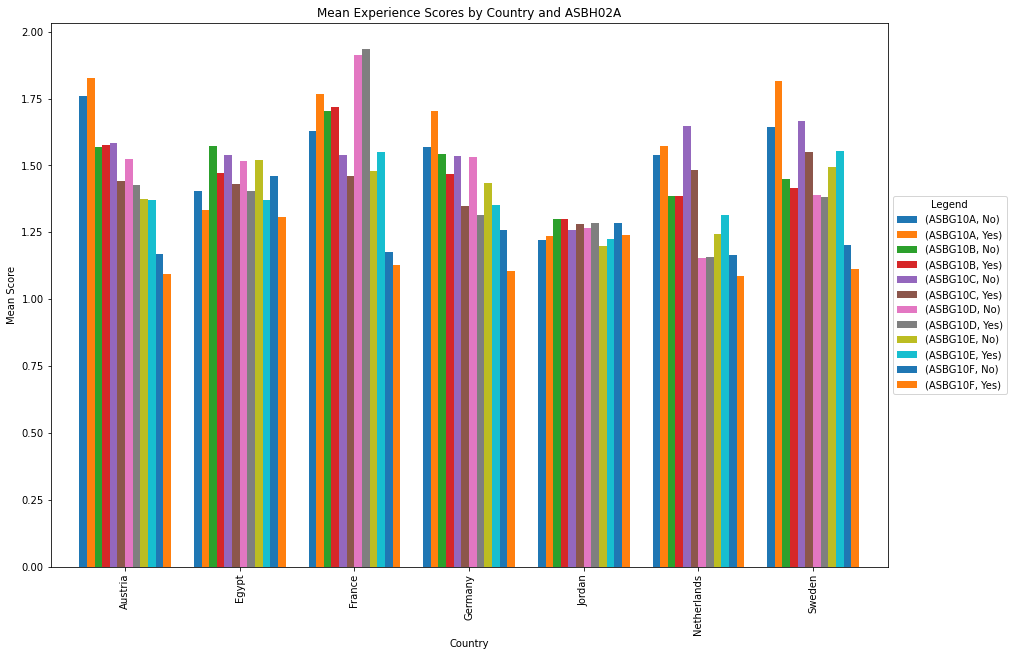

In [38]:
pivot_df_feelings_unstacked = pivot_df_feelingsinschool.unstack(level=1)
ax4 = pivot_df_feelings_unstacked.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('Mean Experience Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

## need to do the df_no,df_yes trick here

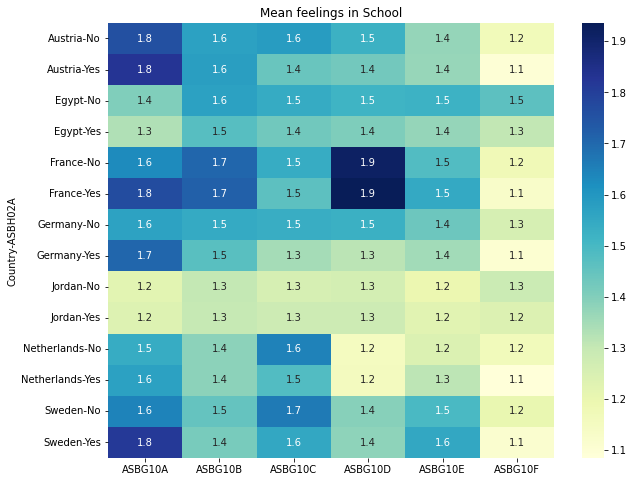

In [28]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_feelingsinschool, annot=True, cmap='YlGnBu')
plt.title('Mean feelings in School')
plt.show()

In [29]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_df_feelingsinschool.groupby(level='Country').mean()

In [30]:
# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

In [31]:
# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

In [32]:
### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [33]:
# Get the current index as a DataFrame for sorting
index_df = pivot_df_feelingsinschool.index.to_frame()

In [34]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

In [35]:
# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

In [36]:
# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_feelingsinschool.loc[index_df.index]

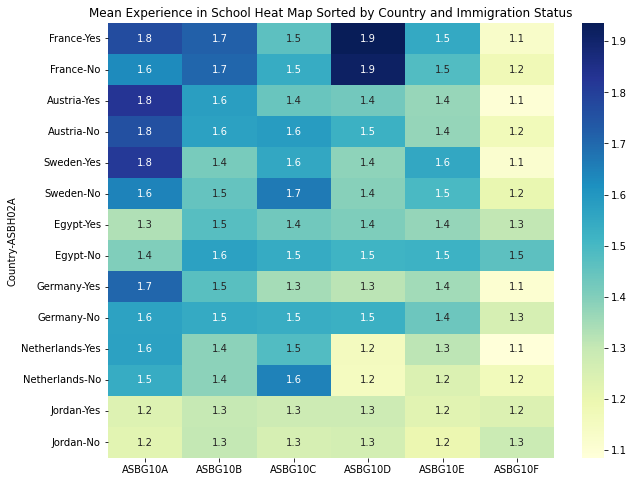

In [37]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL

darker colours are worse